In [4]:
from lsh import *
from utils import *
from query import *
import seaborn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-50000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)
N_data = data.X.shape[1]

PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

In [7]:
b = 200 #hash bits
e = 2.4  #number of permutations

M = round(2*N_data**(1/(1+e)))
print(M)
print(M*(2*L+1))

query_obj = query(data=data, queries_dataset=queries, hash_bits=b, 
                  permutations=M)

L = 4   #number of neighbors to make candidates
k = 10  #top-k nearest neighbors
N_queries = 200

t, ndgc, _ = query_obj.time_and_compare(N_queries, N_neighbor_candidates=L, k_report=k)


48
432


AttributeError: 'query' object has no attribute 'ndgcg_plot'

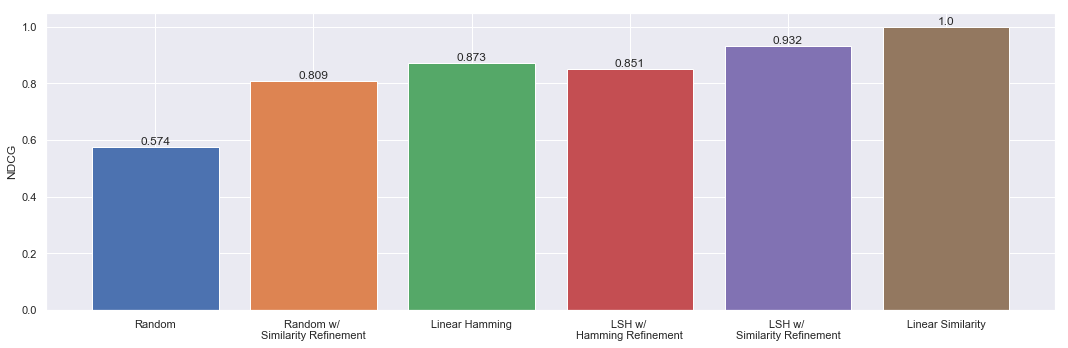

In [9]:
query_obj.ndcg_plot()
